Assignment


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import normaltest
sns.set_theme(style="ticks", color_codes=True)



In [24]:
df = pd.read_csv('/home/nadiera/Desktop/DHET_Data/TVETMIS_STUDENT.csv')
df.head(10)

STUDENT_ID  AGE POPULATION_GROUP DISABILITY  SEEING_RATING HEARING_RATING  \
0     1332738   24          African       None  No difficulty  No difficulty   
1     1332738   22          African       None  No difficulty  No difficulty   
2     1332740   24          African       None  No difficulty  No difficulty   
3     1332740   23          African       None  No difficulty  No difficulty   
4     1332740   22          African       None  No difficulty  No difficulty   
5     1332742   24          African       None  No difficulty  No difficulty   
6     1332742   23          African       None  No difficulty  No difficulty   
7     1332742   22          African       None  No difficulty  No difficulty   
8     1332744   24          African       None  No difficulty  No difficulty   
9     1332744   23          African       None  No difficulty  No difficulty   

  WALKING_RATING COMMUNICATION_RATING REMEMBERING_RATING SELF_CARE_RATING  \
0  No difficulty        No difficulty      No difficulty    No difficulty   
1  No difficulty        No difficulty      No difficulty    No difficulty   
2  No difficulty        No difficulty      No difficulty    No difficulty   
3  No difficulty        No difficulty      No difficulty    No difficulty   
4  No difficulty        No difficulty      No difficulty    No difficulty   
5  No difficulty        No difficulty      No difficulty    No difficulty   
6  No difficulty        No difficulty      No difficulty    No difficulty   
7  No difficulty        No difficulty      No difficulty    No difficulty   
8  No difficulty        No difficulty      No difficulty    No difficulty   
9  No difficulty        No difficulty      No difficulty    No difficulty   

   GENDER HOME_LANGUAGE   NATIONALITY RESIDENT_STATUS               PROVINCE  \
0    Male       siSwati  South Africa    South Africa  South Africa National   
1    Male       siSwati  South Africa    South Africa  South Africa National   
2  Female       siSwati  South Africa    South Africa          Kwazulu/Natal   
3  Female       siSwati  South Africa    South Africa          Kwazulu/Natal   
4  Female       siSwati  South Africa    South Africa          Kwazulu/Natal   
5  Female       siSwati  South Africa    South Africa          Kwazulu/Natal   
6  Female       siSwati  South Africa    South Africa          Kwazulu/Natal   
7  Female       siSwati  South Africa    South Africa          Kwazulu/Natal   
8  Female       siSwati  South Africa    South Africa  South Africa National   
9  Female       siSwati  South Africa    South Africa  South Africa National   

   REPORT_YEAR  
0         2017  
1         2015  
2         2017  
3         2016  
4         2015  
5         2017  
6         2016  
7         2015  
8         2017  
9         2016

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2458664 entries, 0 to 2458663
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   STUDENT_ID            int64 
 1   AGE                   int64 
 2   POPULATION_GROUP      object
 3   DISABILITY            object
 4   SEEING_RATING         object
 5   HEARING_RATING        object
 6   WALKING_RATING        object
 7   COMMUNICATION_RATING  object
 8   REMEMBERING_RATING    object
 9   SELF_CARE_RATING      object
 10  GENDER                object
 11  HOME_LANGUAGE         object
 12  NATIONALITY           object
 13  RESIDENT_STATUS       object
 14  PROVINCE              object
 15  REPORT_YEAR           int64 
dtypes: int64(3), object(13)
memory usage: 300.1+ MB


In [5]:
df.isnull().sum().sum()

0

In [6]:
df.isnull().values.any()

False

In [13]:
df.describe()

STUDENT_ID           AGE   REPORT_YEAR
count  2.458664e+06  2.458664e+06  2.458664e+06
mean   1.400186e+06  2.401039e+01  2.017819e+03
std    8.594856e+05  5.215950e+00  1.484493e+00
min    6.140000e+02  0.000000e+00  2.014000e+03
25%    6.962760e+05  2.100000e+01  2.017000e+03
50%    1.323680e+06  2.300000e+01  2.018000e+03
75%    2.012694e+06  2.600000e+01  2.019000e+03
max    3.213201e+06  1.200000e+02  2.020000e+03

Text(0.5, 0, 'Age')

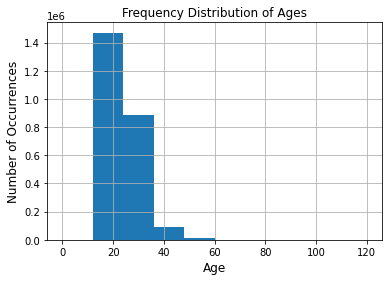

In [41]:
df.hist(column='AGE')
plt.title('Frequency Distribution of Ages')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Age', fontsize=12)

In [61]:
df['AGE'].value_counts().loc[lambda x : x>20] 

21    336767
22    322130
20    290389
23    272081
24    213223
19    180761
25    160022
26    119662
27     90853
28     70464
18     59151
29     55336
30     44200
31     36116
32     30005
33     25365
34     21773
35     18324
36     15357
37     12916
38     10785
39      9210
40      7854
17      7304
41      6781
42      5948
43      5154
44      4496
45      3835
46      3347
47      2846
48      2432
49      2048
50      1806
16      1589
51      1477
52      1240
53      1038
54       870
55       747
56       616
57       448
58       345
59       300
15       240
60       229
61       174
62       121
63        80
64        67
65        54
66        45
68        32
14        31
67        28
69        25
Name: AGE, dtype: int64

In [62]:
df['POPULATION_GROUP'].value_counts(normalize=True)

African     0.917813
Coloured    0.070413
White       0.009180
Indian      0.002340
Unknown     0.000254
Name: POPULATION_GROUP, dtype: float64

/home/nadiera/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


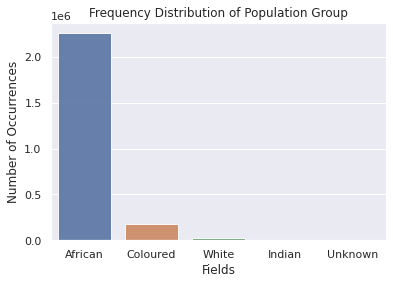

In [63]:
carrier_count = df['POPULATION_GROUP'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Population Group')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Fields', fontsize=12)
plt.show()

In [15]:
df['GENDER'].value_counts(normalize=True)

Female    0.591922
Male      0.408078
Name: GENDER, dtype: float64

<AxesSubplot:ylabel='GENDER'>

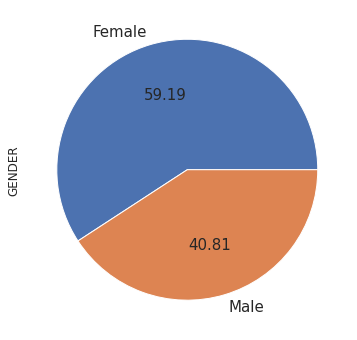

In [51]:
df['GENDER'].value_counts().plot(kind = 'pie',autopct="%.2f",fontsize=15,figsize=(6, 6),)

<AxesSubplot:>

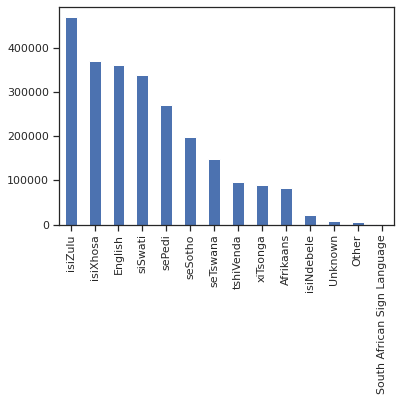

In [53]:
df['HOME_LANGUAGE'].value_counts().plot(kind='bar')


<AxesSubplot:>

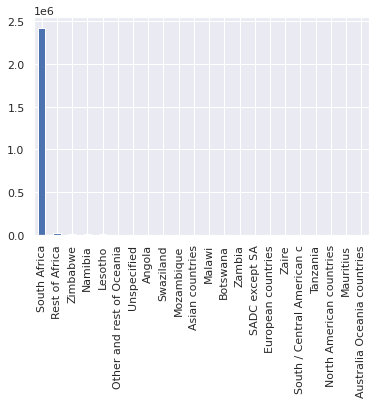

In [65]:
df['NATIONALITY'].value_counts().plot(kind = 'bar')


<AxesSubplot:>

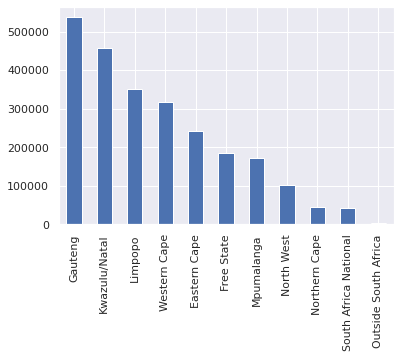

In [65]:
 df['PROVINCE'].value_counts().plot(kind='bar')


In [23]:
df['DISABILITY'].value_counts()

None                          2445042
Sight (even with glasses)        4322
Disabled but unspecified         2886
Physical (move/stand etc)        1985
Intellectual (learn etc)         1326
Multiple                         1064
Hearing (even with h. aid)       1062
Emotional (behav/psych)           752
Communication(talk/listen)        104
None now - was Sight               70
None now - was Emotional           18
None now - was Hearing             14
None now - was Physical            10
None now - was Communic             8
None now - was Disabled US          1
Name: DISABILITY, dtype: int64

<AxesSubplot:>

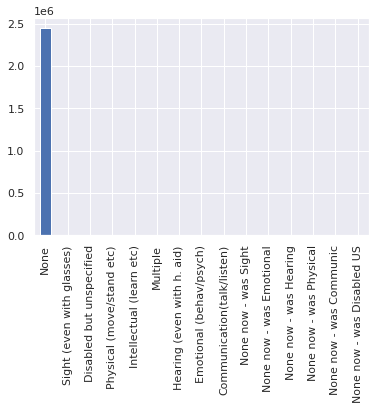

In [69]:
df['DISABILITY'].value_counts().plot(kind='bar')

In [67]:
df['SEEING_RATING'].value_counts(normalize=True)   

No difficulty                           0.970487
Do not know                             0.028273
Cannot do at all                        0.000480
Some difficulty                         0.000458
Cannot yet be determined                0.000196
A lot of difficulty                     0.000054
May have difficulty                     0.000044
May be part of multiple difficulties    0.000007
Name: SEEING_RATING, dtype: float64

In [54]:
df['HEARING_RATING'].value_counts(normalize=True)

No difficulty                           0.970721
Do not know                             0.028156
Cannot do at all                        0.000486
Some difficulty                         0.000378
Cannot yet be determined                0.000194
May have difficulty                     0.000037
A lot of difficulty                     0.000023
May be part of multiple difficulties    0.000006
Name: HEARING_RATING, dtype: float64

In [55]:
df['WALKING_RATING'].value_counts(normalize=True)

No difficulty                           0.970596
Do not know                             0.028220
Cannot do at all                        0.000476
Some difficulty                         0.000423
Cannot yet be determined                0.000188
May have difficulty                     0.000045
A lot of difficulty                     0.000044
May be part of multiple difficulties    0.000009
Name: WALKING_RATING, dtype: float64

In [56]:
df['COMMUNICATION_RATING'].value_counts(normalize=True)

No difficulty                           0.970741
Do not know                             0.028204
Cannot do at all                        0.000460
Some difficulty                         0.000377
Cannot yet be determined                0.000190
May have difficulty                     0.000012
A lot of difficulty                     0.000011
May be part of multiple difficulties    0.000005
Name: COMMUNICATION_RATING, dtype: float64

In [57]:
df['REMEMBERING_RATING'].value_counts(normalize=True)

No difficulty                           0.970791
Do not know                             0.028188
Cannot do at all                        0.000440
Some difficulty                         0.000350
Cannot yet be determined                0.000178
May have difficulty                     0.000033
A lot of difficulty                     0.000015
May be part of multiple difficulties    0.000005
Name: REMEMBERING_RATING, dtype: float64

In [58]:
df['SELF_CARE_RATING'].value_counts(normalize=True)

No difficulty                           0.970616
Do not know                             0.028283
Cannot do at all                        0.000462
Some difficulty                         0.000371
Cannot yet be determined                0.000194
A lot of difficulty                     0.000061
May have difficulty                     0.000010
May be part of multiple difficulties    0.000004
Name: SELF_CARE_RATING, dtype: float64

In [26]:
arr=df['AGE'].values

In [43]:

stat, p = normaltest(arr)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=1220841.985, p=0.000
Probably not Gaussian
